# Домашее задание №5

В файле advertising.csv содержаться данные о клиентах интернет-магазина.

Набор данных содержит следующие переменные:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': cutomer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad


Задача - создать модель, которая будет предсказывать, нажмет ли интернет-пользователь на рекламу, на основе характеристик этого пользователя.

Задания:

    •	Сформулируйте гипотезы исследования.
    •	Постройте модель бинарной логистической регрессии. Зависимая переменная - 'Clicked on Ad'. В качестве предикторов выберите не менее 3 метрических переменных и не менее 2 категориальных переменных.
    •	Напишите уравнение регрессии (линейная часть). Оцените характеристики регрессионной модели. Оцените статическую значимость и предсказательную силу модели.
    •	Оцените значимость регрессионных коэффициентов. Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной.
    •	Проведите диагностику модели (проверьте остатки на нормальность, оцените мультиколлинартность).
    •	Осуществите кросс-валидацию и опишите ее результаты.
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 27 ноября.

In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc

# **Обработка данных, а также отбор независимых переменных**

In [ ]:
ad_info = pd.read_csv("advertising.csv")

ad_info.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Произведем некоторые манипуляции над данными.**

**Для столбика "Country" применим Target Encoding для последующего построения бинарной регрессии.**

**Преимущества данного метода перекодировки заключается в том, что он позволяет сохранить информацию о целевой переменной, а также он удобен для задач с большим количеством категорий.**

**Как работает этот метод? Данный метод вычисляет для каждой категории среднее значение целевой переменной и заменяет ее этим числом. В нашей ситуации целевой переменной является переменная "Clicked on Ad", а выбранной категорией переменная "Country".**

In [ ]:
ad_info['Country'].value_counts()

,count
Country,
France,9
Czech Republic,9
Peru,8
Turkey,8
Greece,8
...,...
Romania,1
British Indian Ocean Territory (Chagos Archipelago),1
Germany,1


In [ ]:
from category_encoders import TargetEncoder

y = ad_info['Clicked on Ad']

encoder = TargetEncoder()
ad_info['Country Encoded'] = encoder.fit_transform(ad_info['Country'], y)

ad_info

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country Encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.458005
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.474256
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.474256
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0.445272
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.474256
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0.532969
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0.484702
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0.532969
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0.541995


**В нашем датасете появился столбик "Country Encoded", который мы можем использовать в качестве независимой переменной для построения бинарной регрессии.**

In [ ]:
ad_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Country Encoded           1000 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 86.1+ KB


**Так как в датасете отсутствуют пропущенные значения, то заполнение пропущенных данных можно пропустить и приступить сразу к отбору независимых переменных.**

**Заскейлим данные с помощью StandardScaler.**

In [ ]:
from sklearn.preprocessing import StandardScaler

corr_val = ad_info[['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Country Encoded']].copy()
corr_val1 = corr_val[['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(corr_val1)

corr_val[['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']] = scaled_data

corr_val.head()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country Encoded
0,-1.0,0.249267,-0.114905,0.509691,1.734030,-0.962695,0.458005
1,-1.0,0.961132,-0.570425,1.002530,0.313805,1.038750,0.474256
2,-1.0,0.282083,-1.139826,0.356949,1.287589,-0.962695,0.474256
3,-1.0,0.577432,-0.798185,-0.014456,1.501580,1.038750,0.445272
4,-1.0,0.212664,-0.114905,1.408868,1.038731,-0.962695,0.474256


<Axes: >

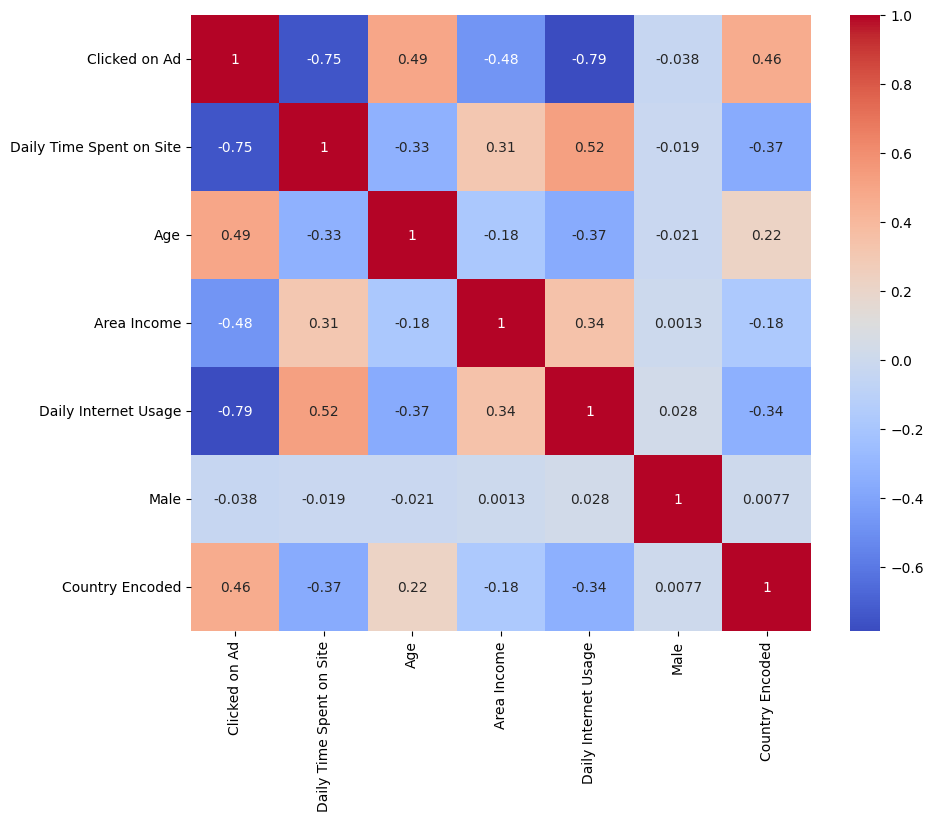

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_val.corr(), annot=True, cmap='coolwarm')

**Заметим, что все признаки имеют достаточно значительное значение корреляции по модулю с целевой переменной, однако у переменной "Male" данное значение составляет -0.038. Но все же я буду его использовать для построения модели, т.к. этот параметр может внести определенные улучшения в качестве моей модели.**

**Отдельно отмечу, что между собой переменные сильно не коррелируют, что также является плюсом.**

**В итоге, для построения бинарной регрессии я буду использовать следующие переменные: 'Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Country Encoded'.**

# **Построение модели бинарной логистической регрессии**

In [ ]:
x_values = corr_val[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Country Encoded']]
y_value = corr_val['Clicked on Ad']
x_const = sm.add_constant(x_values)

model1 = sm.Logit(y, x_const).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.075605
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.8909
Time:                        11:28:41   Log-Likelihood:                -75.605
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.221e-263
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -15.8799      3.780     -4.201      0.000     -23.28

**Кратко оценим качество полученной модели.**

In [ ]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.890925
Model significance = 0.000000


**Заметим, что модель статистически значима и объясняет 89% изменчивости значений зависимой переменной, что является высоким результатом.**

# **Уравнение регрессии, а также оценка характеристики регрессионной модели, статистической значимости и предсказательной силы модели.**

In [ ]:
l = []
for param, index in zip(model1.params.iloc[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:.2f} + {}'.format(model1.params.iloc[0], ' + '.join(l)))

logit(p) = -15.88 + -2.88*Daily Time Spent on Site + 1.44*Age + -1.73*Area Income + -2.83*Daily Internet Usage + -0.15*Male + 34.95*Country Encoded


**Найдем предсказанные вероятности события "Clicked on Ad" для всех наблюдений. Для наглядности я добавлю дополнительную колонку со значениями, которые предсказала моя модель, назову её 'Predicted Values Before Sigmoid'. Далее, чтобы найти вероятность нашего события "Кликнет на рекламу", я подставлю в формулу sigmoid, которая равна 1/(1+exp^(-x)), для этого я напишу метод, который будет считать вероятность для каждого наблюдения, а также для определения точности происхождения события, я выставлю порог в 0,5, то есть, если моя вероятность будет выше чем указанный порог, то будем считать, что пользователь кликнет на рекламу.**

In [ ]:
corr_val['Predicted Values Before Sigmoid'] = model1.fittedvalues
values = corr_val['Predicted Values Before Sigmoid'].copy()

In [ ]:
def sigmoid(values):
    value = 1 / (1 + np.exp(-values))
    if (value >0.5):
      return 1
    else:
      return -1

result = corr_val['Predicted Values Before Sigmoid'].apply(sigmoid)
corr_val['Predicted Event'] = result

corr_val

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country Encoded,Predicted Values Before Sigmoid,Predicted Event
0,-1.0,0.249267,-0.114905,0.509691,1.734030,-0.962695,0.458005,-6.396065,-1
1,-1.0,0.961132,-0.570425,1.002530,0.313805,1.038750,0.474256,-5.668088,-1
2,-1.0,0.282083,-1.139826,0.356949,1.287589,-0.962695,0.474256,-5.870128,-1
3,-1.0,0.577432,-0.798185,-0.014456,1.501580,1.038750,0.445272,-7.503914,-1
4,-1.0,0.212664,-0.114905,1.408868,1.038731,-0.962695,0.474256,-5.310539,-1
...,...,...,...,...,...,...,...,...,...
995,1.0,0.502963,-0.684305,1.222006,0.651314,1.038750,0.532969,-3.793133,-1
996,1.0,-0.864601,1.023896,0.953329,-1.038735,1.038750,0.484702,6.159351,1
997,1.0,-0.843775,1.707176,-0.938570,-1.358924,1.038750,0.532969,12.943453,1
998,-1.0,-0.596389,-1.936986,-0.975484,0.181172,-0.962695,0.541995,3.313262,1


**Рассчитаем для нашей модели следующие метрики: Accuracy, Precision, Recall, F1, AUC-ROC.**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score

print(f"Accuracy: {accuracy_score(corr_val['Clicked on Ad'], corr_val['Predicted Event'])}")
print(f"Precision: {precision_score(corr_val['Clicked on Ad'], corr_val['Predicted Event'])}")
print(f"Recall: {recall_score(corr_val['Clicked on Ad'], corr_val['Predicted Event'])}")
print(f"F1: {f1_score(corr_val['Clicked on Ad'], corr_val['Predicted Event'])}")
print(f"Roc Auc Score: {roc_auc_score(corr_val['Clicked on Ad'], corr_val['Predicted Event'])}")

Accuracy: 0.973
Precision: 0.9777777777777777
Recall: 0.968
F1: 0.9728643216080402
Roc Auc Score: 0.973


**Итак, разберём каждый критерий по отдельности:**

**1. Accuracy**

**Значение 0.973 показывает, что модель правильно предсказывает метки классов для большинства объектов.**

**2. Precision**

**Значение 0.9(7) указывает на то, что модель делает мало ложноположительных предсказаний.**

**3. Recall**

**Значение 0.968 показывает, что модель способна находить практически все объекты положительного класса.**

**4. F1**

**Значение 0.973 говорит о сбалансированной производительности модели, так как она одинаково хорошо минимизирует как ложноположительные, так и ложноотрицательные ошибки.**

**5. Roc Auc Score**

**Значение 0.973 говорит о том, что модель хорошо отделяет положительный и отрицательный классы.**


**Изобразим также ROC кривую для нашей модели.**


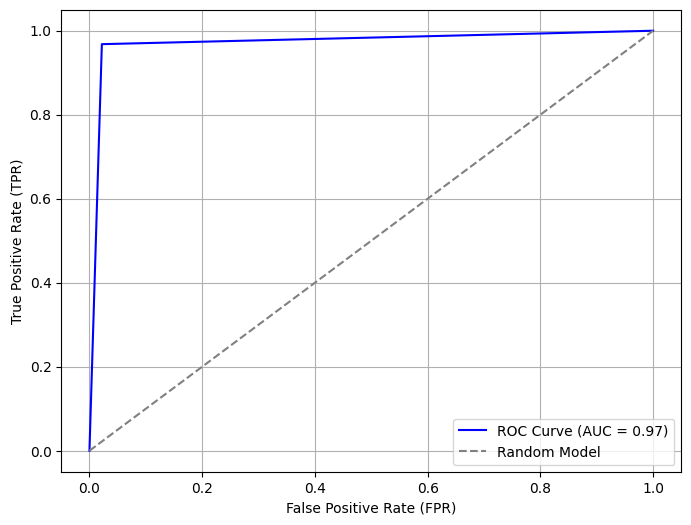

In [ ]:
fpr, tpr, thresholds = roc_curve(corr_val['Clicked on Ad'], corr_val['Predicted Event'])
roc_auc = roc_auc_score(corr_val['Clicked on Ad'], corr_val['Predicted Event'])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="Random Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Можем увидеть, что график близок к левому верхнему углу, что указывает на хорошее качество модели. Она хорошо разделяет положительные и отрицательные классы. FPR (False Positive Rate) остаётся низким даже при высоком уровне TPR (True Positive Rate). Это говорит о том, что модель делает мало ложноположительных ошибок. Высокий TPR при низком FPR подтверждает, что модель успешно определяет большую часть объектов положительного класса без существенного увеличения числа ошибок.**

# **Оценка значимости регрессионных коэффициентов. Подробная интерпретация особенностей взаимосвязи между каждым из предикторов и зависимой переменной**

**Зависимая переменная — Clicked on Ad (клик по рекламе).**
___

**Daily Time Spent on Site:**

**Отрицательный коэффициент (-2.8814) означает, что с увеличением времени на сайте вероятность клика снижается. Это может говорить о том, что пользователи, долго находящиеся на сайте, не заинтересованы реагировать на рекламу.**
___

**Age:**

**Положительный коэффициент (1.4379) указывает на то, что с увеличением возраста вероятность клика по рекламе возрастает. Возможно, более взрослые пользователи более заинтересованы в рекламе.**
___

**Area Income:**

**Отрицательный коэффициент (-1.7281) свидетельствует о том, что пользователи с более высоким доходом не заинтересованы в рекламе. Это может быть связано с меньшей восприимчивостью к рекламным предложениям у обеспеченной аудитории.**
___

**Daily Internet Usage:**

**Коэффициент (-2.8274) показывает, что чем больше времени пользователь проводит в интернете, тем меньше вероятность клика. Это может быть связано с эффектом усталости от большого количества рекламы.**
___

**Male (гендер):**

**Коэффициент (0.1488) незначим (p-value > 0.05), следовательно, пол (мужчина или женщина) не оказывает статистически значимого влияния на вероятность клика.**
___

**Country Encoded:**

**Коэффициент (34.9510) свидетельствует о сильной зависимости от страны. Различия в странах могут объясняться культурными и экономическими факторами, которые влияют на поведение пользователей.**
___

# **Проверка диагностики модели (проверка остатков на нормальность, оценка мультиколлинеарности)**

**Для начала проверим независимые переменные на мультиколлинераность, проверив значения VIF.**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

X = model1.model.exog
X = X[:, 1:]


vifs = [vif(X, i) for i in range(X.shape[1])]

vif_df = pd.DataFrame()
vif_df['VIF'] = vifs
vif_df['Features'] = model1.model.exog_names[1:]
vif_df = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df)

        VIF                  Features
3  1.517507      Daily Internet Usage
0  1.452329  Daily Time Spent on Site
1  1.195614                       Age
2  1.163385               Area Income
4  1.002687                      Male
5  1.001171           Country Encoded


**Заметим, что значение VIF у каждого предиктора меньше 10, что свидетельствует об отсутствии мультиколлинеарности между ними.**

**Проверим остатки на нормальность.**

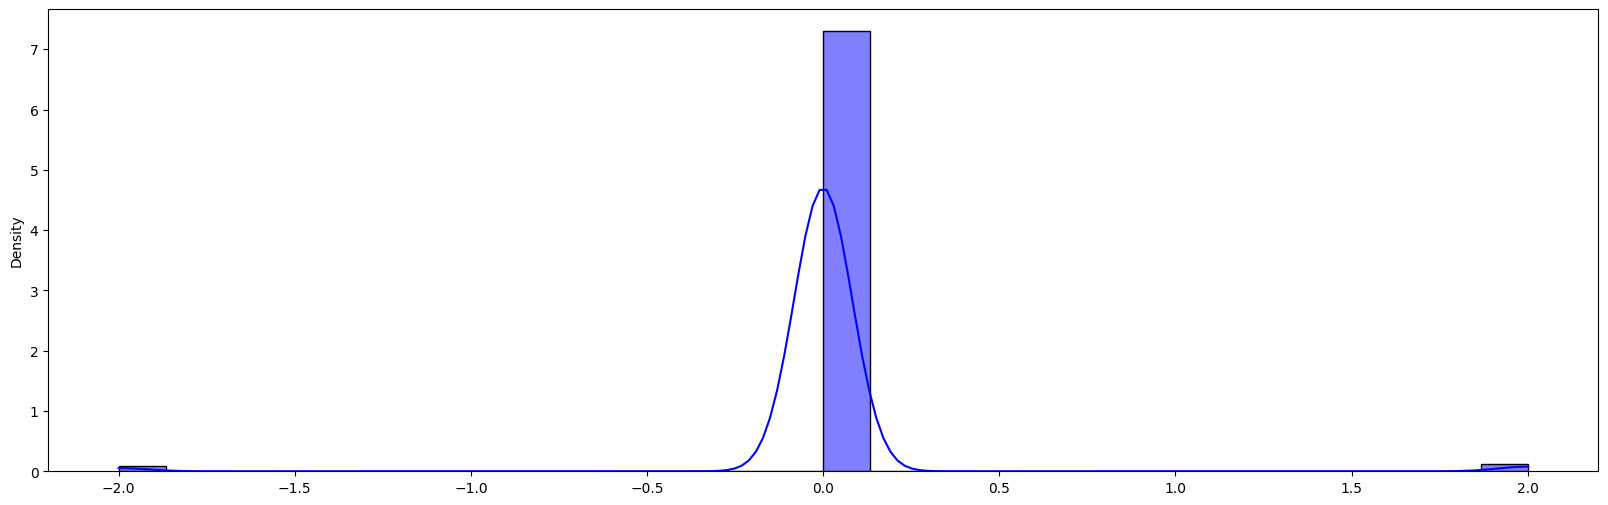

In [ ]:
residuals = corr_val['Clicked on Ad'] - corr_val['Predicted Event']

plt.figure(figsize=(20,6))
sns.histplot(residuals, kde=True, stat="density", bins=30, color='blue')
plt.show()

**Как можно увидеть, мы имеем дело с пиком в районе нуля и данные значительно сужены по бокам, что отклоняется от нормального распределения.**

# **Кросс-Валидация**

In [ ]:
def counting(data1, data2):
    return (data1 != data2).sum()

number = counting(corr_val['Clicked on Ad'], corr_val['Predicted Event'])
print(number)

27


**Для начала разделим наши данные на тестовую и тренировочную выборки в пропорции 80% на 20%.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(x_values, y_value, test_size=0.2, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_train)

clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 97.25%
_______________________________________________
CLASSIFICATION REPORT:
                 -1.0         1.0  accuracy   macro avg  weighted avg
precision    0.962500    0.982500    0.9725    0.972500      0.972700
recall       0.982143    0.963235    0.9725    0.972689      0.972500
f1-score     0.972222    0.972772    0.9725    0.972497      0.972503
support    392.000000  408.000000    0.9725  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[385   7]
 [ 15 393]]



In [ ]:
pred = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 98.00%
_______________________________________________
CLASSIFICATION REPORT:
                 -1.0        1.0  accuracy   macro avg  weighted avg
precision    0.972727   0.988889      0.98    0.980808      0.980162
recall       0.990741   0.967391      0.98    0.979066      0.980000
f1-score     0.981651   0.978022      0.98    0.979837      0.979982
support    108.000000  92.000000      0.98  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[107   1]
 [  3  89]]



**По результатам тестирования train_test_split, мы можем увидеть, что модель работает хорошо как на обучающей, так и на тестовой выборках. На обучающей выборке точность составляет 97.25%, что указывает на высокую способность модели корректно распределять по классам данные. Метрики precision, recall и F1-score для обоих классов находятся на уровне 96–98%, что говорит о том, что модель совершает малое количество ложных предсказаний. Confusion matrix показывает, что из 800 примеров модель ошиблась всего в 22 случаях (15 примеров класса -1.0 и 7 примеров класса 1.0).**

**На тестовой выборке модель демонстрирует еще лучшие результаты — точность 98%. Precision, recall и F1-score для обоих классов также остаются на уровне 97–99%, что подтверждает способность модели эффективно обобщать данные. Confusion matrix показывает, что из 200 тестовых примеров было сделано всего 4 ошибки (3 для класса -1.0 и 1 для класса 1.0). Эти результаты подтверждают, что модель надежна и хорошо справляется как с обучающими, так и с тестовыми данными.**

# **Общий вывод**

**Модель прогнозирования клика по рекламе демонстрирует высокую точность (97.3%), что подтверждается метриками Precision (97.8%), Recall (96.8%), F1-Score (97.3%) и ROC AUC Score (97.3%). Она успешно справляется с задачей классификации, указывая на значимость ряда факторов. Отрицательный коэффициент для времени, проведённого на сайте (-2.8814), и ежедневного интернет-пользования (-2.8274) говорит о снижении вероятности клика при увеличении этих параметров, что может быть связано с меньшей восприимчивостью пользователей, активно использующих интернет. Возраст (коэффициент 1.4379) положительно влияет на вероятность клика, что свидетельствует о большем интересе более зрелой аудитории. Доход (-1.7281) отрицательно связан с кликами, показывая, что пользователи с высоким доходом менее заинтересованы в рекламе. Пол (коэффициент 0.1488) статистически незначим, что означает отсутствие существенного влияния гендера на поведение пользователей. Напротив, коэффициент для страны (34.9510) подчёркивает сильную зависимость поведения от географического фактора, что может быть связано с культурными и экономическими различиями.**

**Модель была обучена и протестирована на разделённых выборках с использованием train-test split, где 80% данных использовались для обучения, а 20% — для тестирования. На обучающей выборке модель показала точность 97.25%, а на тестовой — 98%, что говорит об отличной способности модели классифицировать данные. Метрики на обеих выборках (Precision, Recall, F1-Score) находятся на сопоставимо высоком уровне, что подтверждает хорошую производительность. Такой подход позволяет с уверенностью утверждать, что модель может эффективно работать на новых данных и адекватно отражает зависимости, существующие в исследуемой выборке.**

**Таким образом, модель надёжно предсказывает поведение пользователей, учитывая важные социально-демографические и поведенческие особенности.**